In [37]:
from keras.utils import np_utils, to_categorical
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar100.load_data()
    trainY = np_utils.to_categorical(trainY)
    testY = np_utils.to_categorical(testY)
    trainX, validX, trainY, validY = train_test_split(trainX, trainY, train_size=0.2)
    return trainX, trainY , validX, validY, testX, testY

In [3]:
def prep_pixels(train, valid , test):
    train_norm = train.astype('float32')
    valid_norm = valid.astype('float32')
    test_norm = test.astype('float32')
	# normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    valid_norm = valid_norm / 255.0
	# return normalized images
    return train_norm, valid_norm, test_norm

In [9]:
def define_model(k):
    model = Sequential()

    model.add(Conv2D(32, k, activation='elu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, k, activation='elu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, k, activation='elu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [45]:

def define_model_drop():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(256, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def summarize_diagnostics(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(history.history['accuracy'], color='blue', label='train')
    ax1.plot( history.history['val_accuracy'], color='orange', label='valid')
    ax1.legend(['Train Accuracy', 'Validation Accuracy'])
    ax2.plot( history.history['loss'], color='blue', label='train')
    ax2.plot( history.history['val_loss'], color='orange', label='valid')
    ax2.legend(['Train Loss', 'Validation Loss'])
    plt.show()

In [11]:
def run_test_harness(ep, def_model):
    # load dataset
    trainX, trainY, validX, validY, testX, testY = load_dataset()
    # prepare pixel data
    model = def_model
    model.summary()
    history = model.fit(trainX, trainY, epochs=ep, validation_data=(validX, validY), verbose=1)
    score = model.evaluate(testX, testY, verbose=0)
    print('\n', 'Test accuracy:', score[1])
    summarize_diagnostics(history)

169009152/169001437 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_____________________________________________________

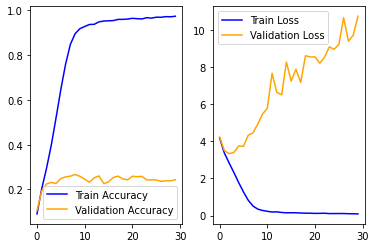

In [12]:
run_test_harness(30, define_model((3,3)))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

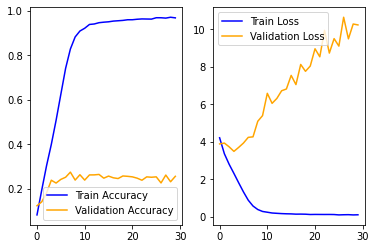

In [13]:
run_test_harness(30, define_model((2,2)))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_54 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_55 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 64)        

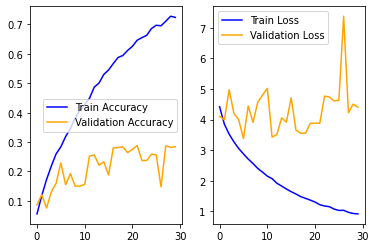

In [46]:
run_test_harness(30, define_model_drop())

In [56]:
def plot_kernel(mod):
  #plot the filters
  model = mod
  for layer in model.layers:
      # check for convolutional layer
      if 'conv' not in layer.name:
          continue
      # get filter weights
      filters, biases = layer.get_weights()
      print(layer.name, filters.shape)

  filters, biases = model.layers[-7].get_weights()
  figure(num=None, figsize=(60, 60), dpi=80, edgecolor='k')
  # normalize filter values to 0-1 so we can visualize them
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  # plot first few filters
  n_filters, ix = 64, 1
  for i in range(n_filters):
      # get the filter
      f = filters[:, :, :, i]
      # plot each channel separately
      for j in range(3):
          ax = plt.subplot(n_filters, 3, ix)
          ax.set_xticks([])
          ax.set_yticks([])
          plt.imshow(f[:, :, j])
          ix += 1
  plt.show()

conv2d_73 (2, 2, 3, 32)
conv2d_74 (2, 2, 32, 64)
conv2d_75 (2, 2, 64, 128)


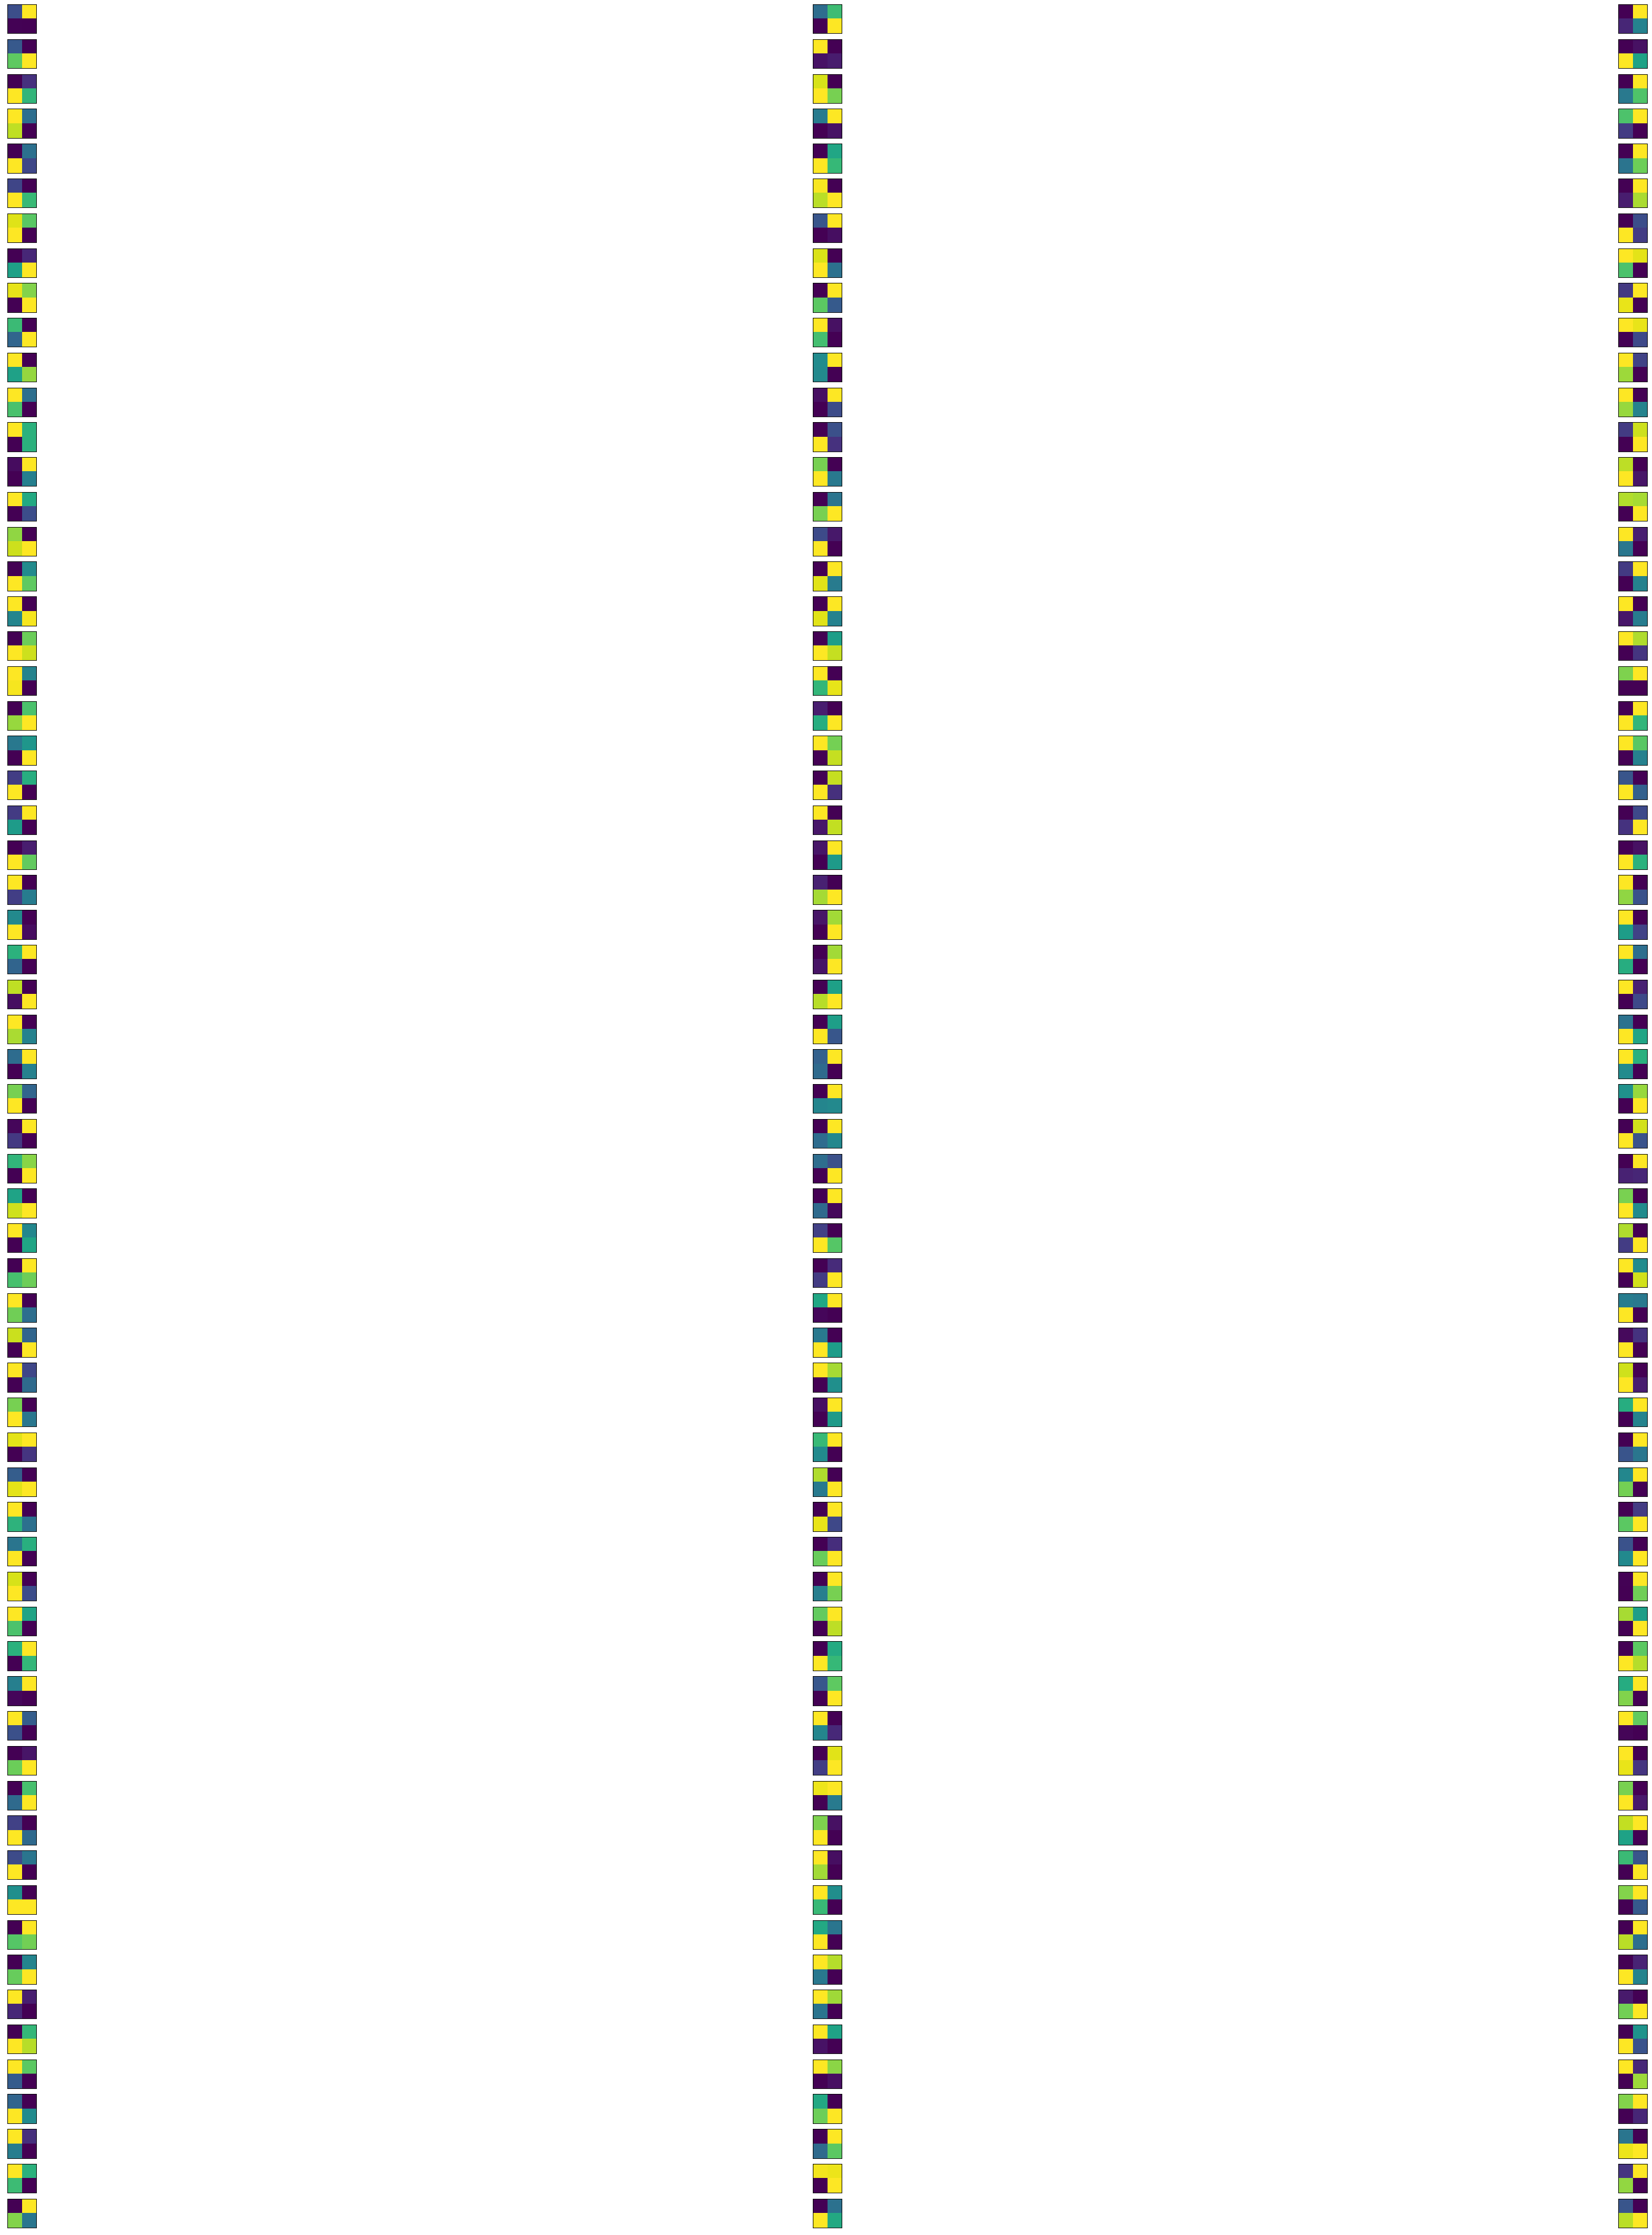

In [57]:
plot_kernel(define_model((2,2)))

conv2d_76 (3, 3, 3, 32)
conv2d_77 (3, 3, 32, 64)
conv2d_78 (3, 3, 64, 128)


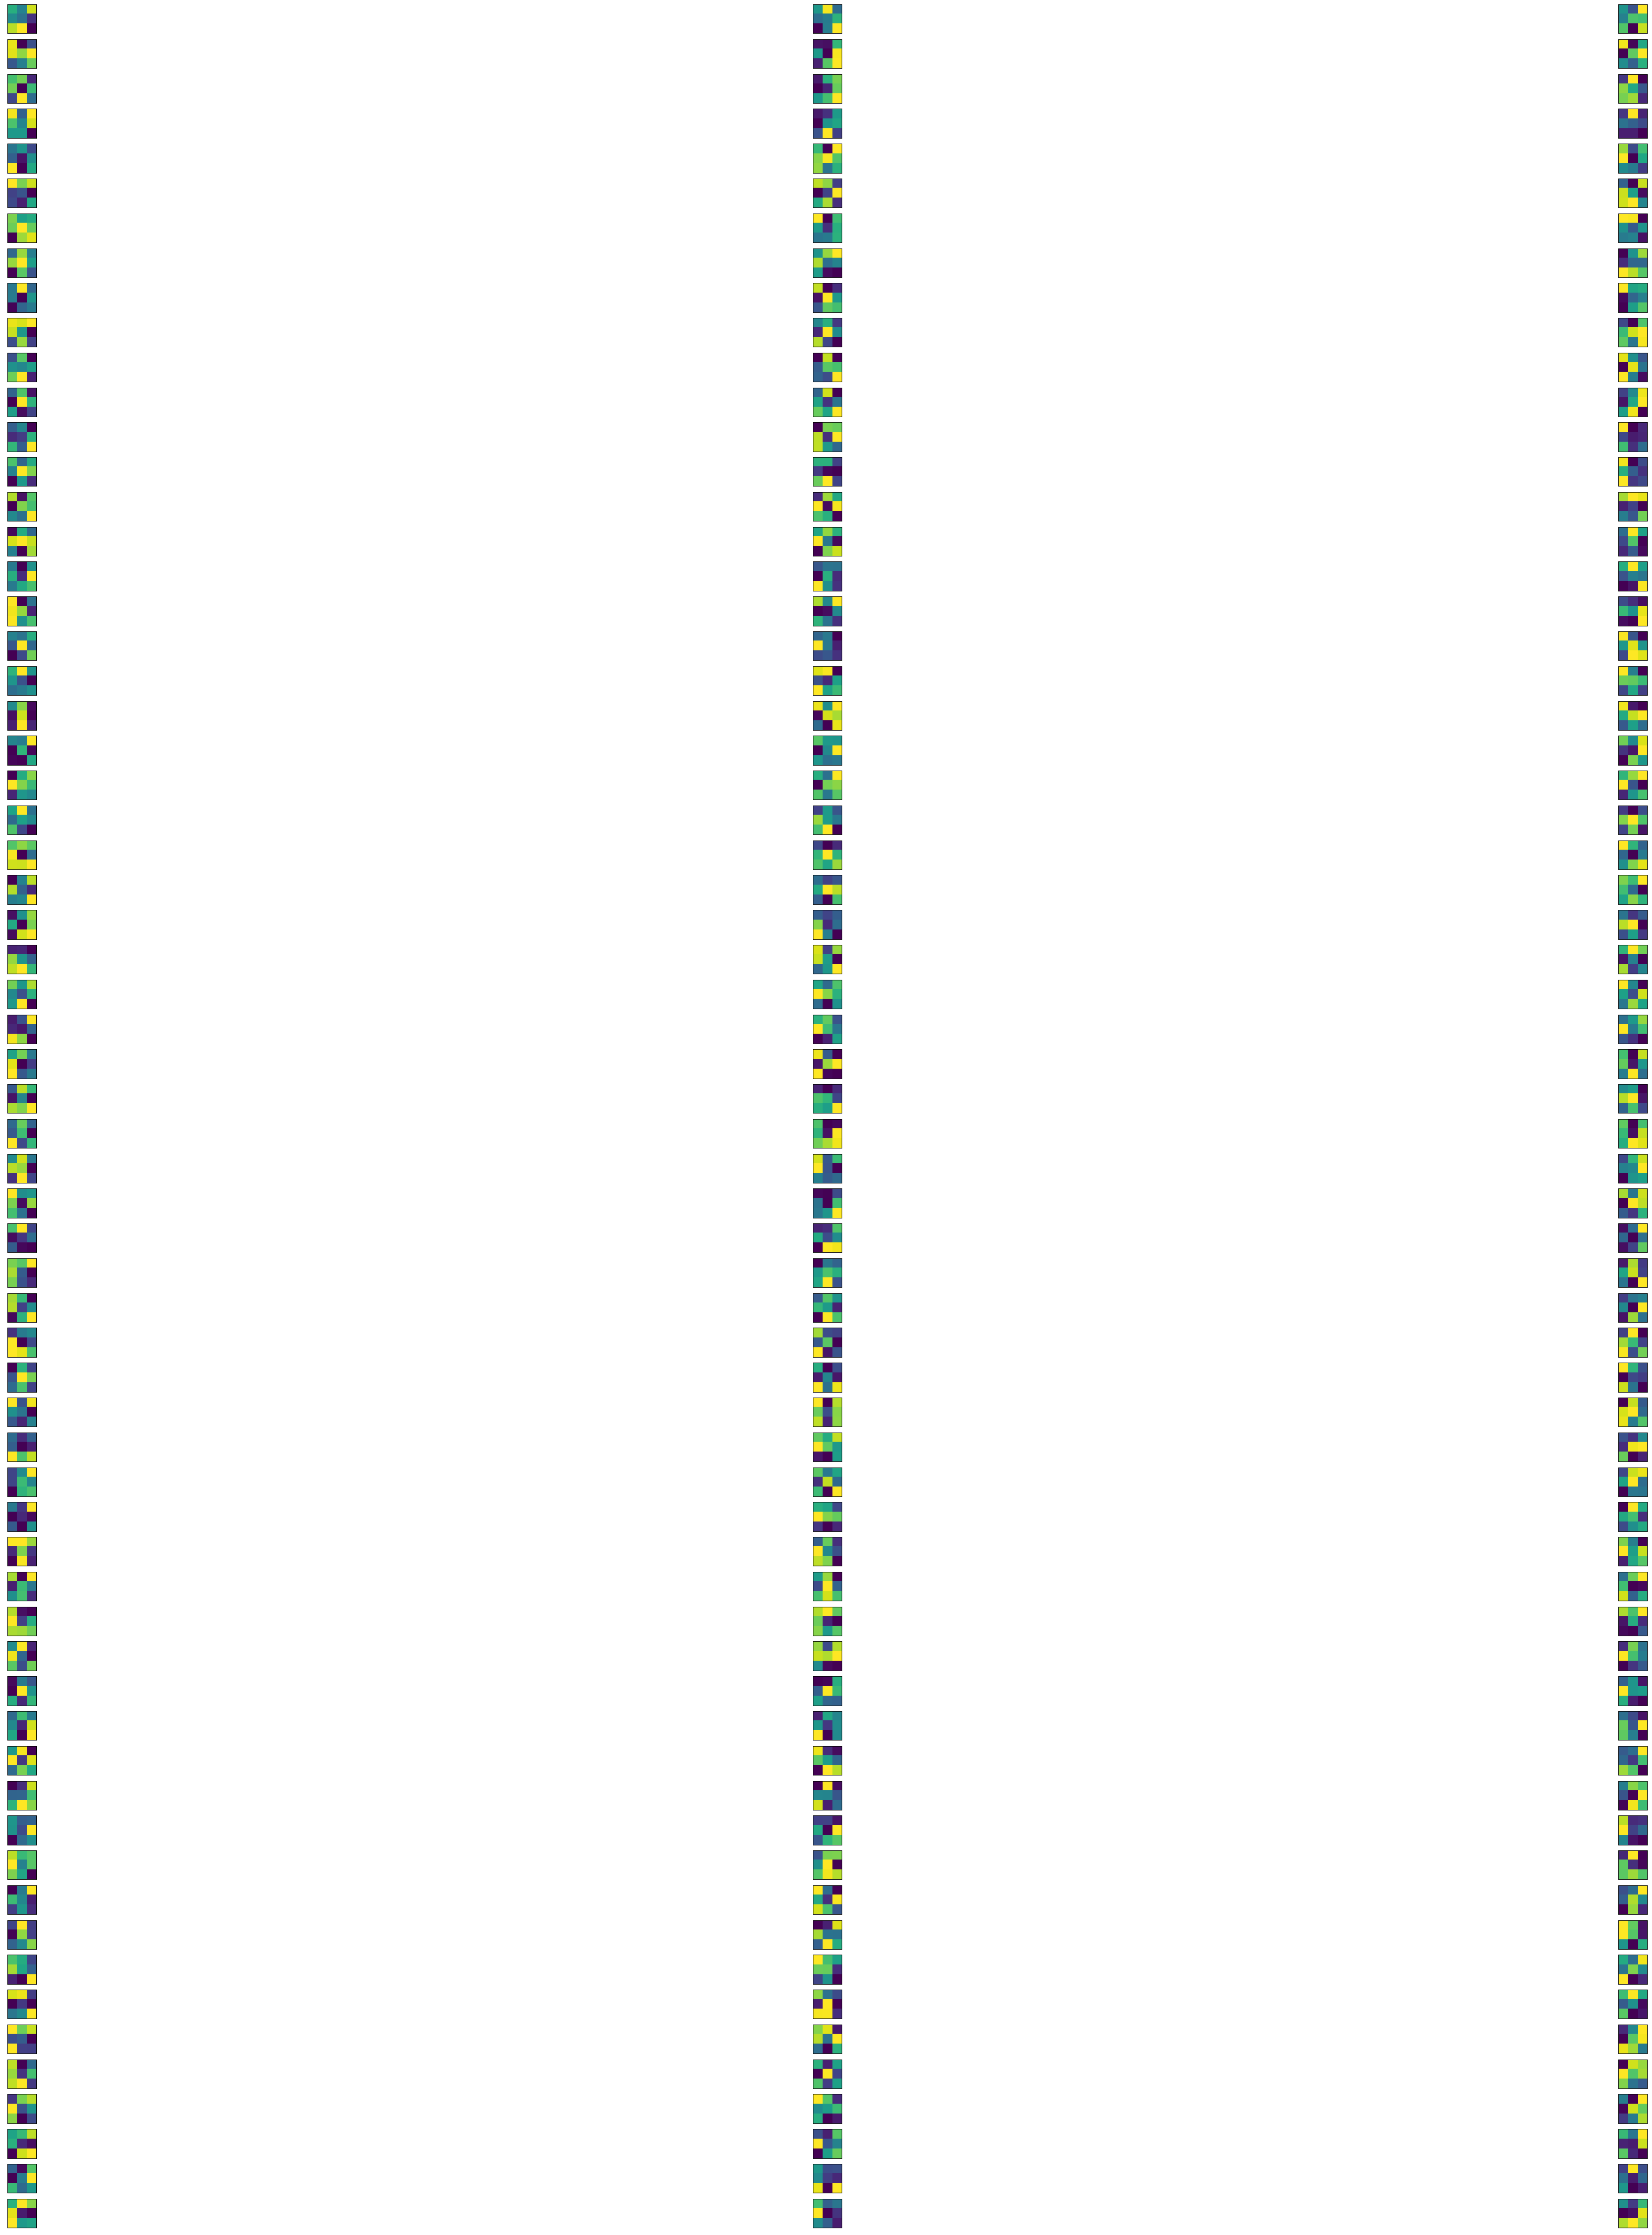

In [58]:
plot_kernel(define_model((3,3)))